In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Importing the citipy module.
# The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

# The above is a list of tuples we will iterate through to find a city with coordinates closest to these ones.

In [5]:
# You can only unzip a zipped tuple once before it is removed from the computer's memory.
# Here we make sure that the latitudes and longitudes are unzipped into the coordiantes list before moving on.


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the timelibrary and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | te anau
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | norman wells
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | wadi maliz
Processing Record 9 of Set 1 | yatou
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | hokitika
Processing Record 13 of Set 1 | baykit
Processing Record 14 of Set 1 | geraldton
Processing Record 15 of Set 1 | cayenne
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | shimoda
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 of Set 1 | alofi
Processing Record 22 of Set 1 | kananga
Processing Record

Processing Record 36 of Set 4 | tazovskiy
Processing Record 37 of Set 4 | zhezkazgan
Processing Record 38 of Set 4 | nizhniy kuranakh
Processing Record 39 of Set 4 | salug
Processing Record 40 of Set 4 | maningrida
Processing Record 41 of Set 4 | vao
Processing Record 42 of Set 4 | mareeba
Processing Record 43 of Set 4 | feijo
Processing Record 44 of Set 4 | westport
Processing Record 45 of Set 4 | grenaa
Processing Record 46 of Set 4 | palenque
Processing Record 47 of Set 4 | sao filipe
Processing Record 48 of Set 4 | viedma
Processing Record 49 of Set 4 | dukat
Processing Record 50 of Set 4 | kalabo
Processing Record 1 of Set 5 | mlawa
Processing Record 2 of Set 5 | topolobampo
Processing Record 3 of Set 5 | sawakin
Processing Record 4 of Set 5 | husavik
Processing Record 5 of Set 5 | urumqi
Processing Record 6 of Set 5 | maldonado
Processing Record 7 of Set 5 | caldwell
Processing Record 8 of Set 5 | ancud
Processing Record 9 of Set 5 | quatre cocos
Processing Record 10 of Set 5 | k

Processing Record 28 of Set 8 | kemijarvi
Processing Record 29 of Set 8 | leh
Processing Record 30 of Set 8 | krivosheino
Processing Record 31 of Set 8 | san cristobal
Processing Record 32 of Set 8 | catamarca
Processing Record 33 of Set 8 | booue
Processing Record 34 of Set 8 | duluth
Processing Record 35 of Set 8 | gavle
Processing Record 36 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 37 of Set 8 | surt
Processing Record 38 of Set 8 | orange cove
Processing Record 39 of Set 8 | wajima
Processing Record 40 of Set 8 | tigil
Processing Record 41 of Set 8 | potsdam
Processing Record 42 of Set 8 | mayor pablo lagerenza
Processing Record 43 of Set 8 | shizunai
Processing Record 44 of Set 8 | vila franca do campo
Processing Record 45 of Set 8 | kirovskiy
Processing Record 46 of Set 8 | korla
Processing Record 47 of Set 8 | joshimath
Processing Record 48 of Set 8 | goundam
Processing Record 49 of Set 8 | masvingo
Processing Record 50 of Set 8 | taoudenni
Processing R

Processing Record 20 of Set 12 | palembang
Processing Record 21 of Set 12 | yerbogachen
Processing Record 22 of Set 12 | kushmurun
Processing Record 23 of Set 12 | ochamchira
Processing Record 24 of Set 12 | urbano santos
Processing Record 25 of Set 12 | mayo
Processing Record 26 of Set 12 | maniitsoq
Processing Record 27 of Set 12 | robe
Processing Record 28 of Set 12 | bad goisern
Processing Record 29 of Set 12 | ambilobe
Processing Record 30 of Set 12 | rincon
Processing Record 31 of Set 12 | liepaja
Processing Record 32 of Set 12 | okhotsk
Processing Record 33 of Set 12 | alice springs
Processing Record 34 of Set 12 | yilan
Processing Record 35 of Set 12 | requena
Processing Record 36 of Set 12 | saint-joseph
Processing Record 37 of Set 12 | port lincoln
Processing Record 38 of Set 12 | harper
Processing Record 39 of Set 12 | ngatea
Processing Record 40 of Set 12 | tolaga bay
Processing Record 41 of Set 12 | kargasok
Processing Record 42 of Set 12 | chongwe
Processing Record 43 of 

In [11]:
# Tallying number of cities in the city_data array of dictionaries.
len(city_data)

559

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,51.46,62,0,11.50,AR,2022-02-05 00:12:37
1,Te Anau,-45.4167,167.7167,58.87,46,24,4.05,NZ,2022-02-05 00:15:32
2,Jamestown,42.0970,-79.2353,19.29,51,100,3.44,US,2022-02-05 00:17:24
3,Norman Wells,65.2820,-126.8329,-11.16,64,75,19.57,CA,2022-02-05 00:17:25
4,Rikitea,-23.1203,-134.9692,79.02,67,5,5.97,PF,2022-02-05 00:17:25
5,Kodiak,57.7900,-152.4072,38.71,81,75,4.61,US,2022-02-05 00:17:26
6,Carnarvon,-24.8667,113.6333,88.41,33,80,10.40,AU,2022-02-05 00:17:26
7,Wadi Maliz,36.4681,8.5495,48.65,52,60,4.45,TN,2022-02-05 00:17:26
8,Yatou,37.1500,122.3833,26.19,48,79,12.37,CN,2022-02-05 00:17:27
9,Atuona,-9.8000,-139.0333,78.40,77,25,16.58,PF,2022-02-05 00:12:30


In [13]:
# Reordering the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-02-05 00:12:37,-54.8000,-68.3000,51.46,62,0,11.50
1,Te Anau,NZ,2022-02-05 00:15:32,-45.4167,167.7167,58.87,46,24,4.05
2,Jamestown,US,2022-02-05 00:17:24,42.0970,-79.2353,19.29,51,100,3.44
3,Norman Wells,CA,2022-02-05 00:17:25,65.2820,-126.8329,-11.16,64,75,19.57
4,Rikitea,PF,2022-02-05 00:17:25,-23.1203,-134.9692,79.02,67,5,5.97
5,Kodiak,US,2022-02-05 00:17:26,57.7900,-152.4072,38.71,81,75,4.61
6,Carnarvon,AU,2022-02-05 00:17:26,-24.8667,113.6333,88.41,33,80,10.40
7,Wadi Maliz,TN,2022-02-05 00:17:26,36.4681,8.5495,48.65,52,60,4.45
8,Yatou,CN,2022-02-05 00:17:27,37.1500,122.3833,26.19,48,79,12.37
9,Atuona,PF,2022-02-05 00:12:30,-9.8000,-139.0333,78.40,77,25,16.58


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

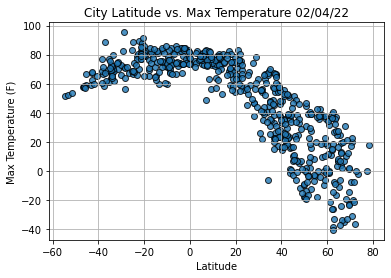

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

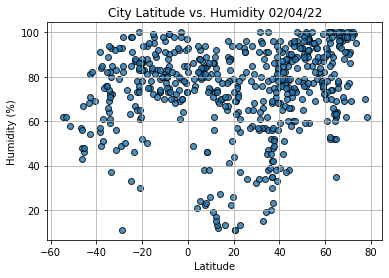

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

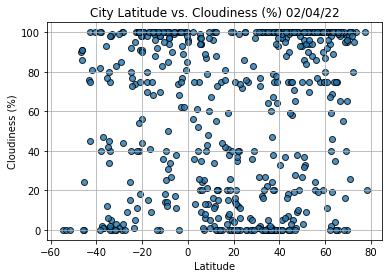

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

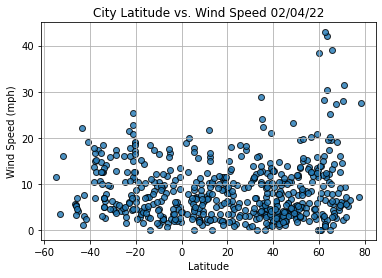

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()  

In [21]:
index13 = city_data_df.loc[13]
index13

City                    Geraldton
Country                        AU
Date          2022-02-05 00:17:28
Lat                      -28.7667
Lng                         114.6
Max Temp                    95.41
Humidity                       11
Cloudiness                      0
Wind Speed                  17.27
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
554     True
555     True
556     True
557     True
558     True
Name: Lat, Length: 559, dtype: bool

In [23]:
# Returns a DataFrame fitting the criteria:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Jamestown,US,2022-02-05 00:17:24,42.0970,-79.2353,19.29,51,100,3.44
3,Norman Wells,CA,2022-02-05 00:17:25,65.2820,-126.8329,-11.16,64,75,19.57
5,Kodiak,US,2022-02-05 00:17:26,57.7900,-152.4072,38.71,81,75,4.61
7,Wadi Maliz,TN,2022-02-05 00:17:26,36.4681,8.5495,48.65,52,60,4.45
8,Yatou,CN,2022-02-05 00:17:27,37.1500,122.3833,26.19,48,79,12.37


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

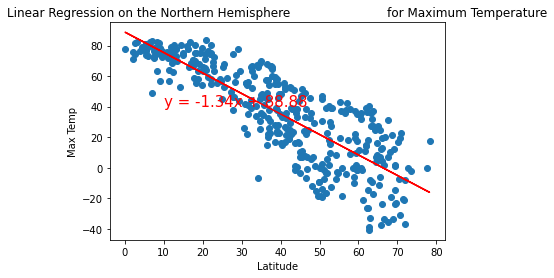

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

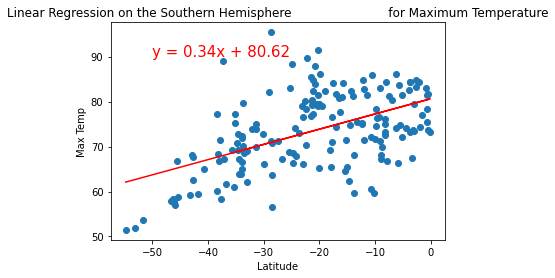

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

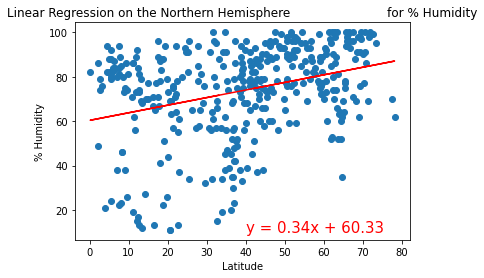

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

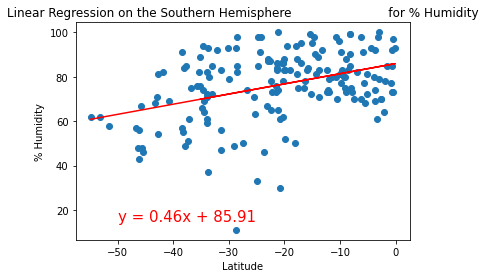

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

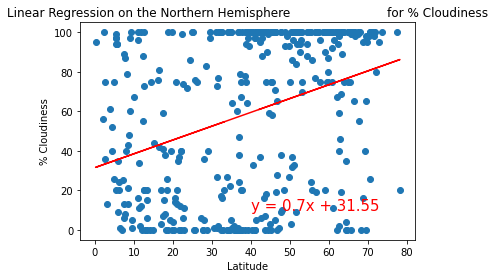

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

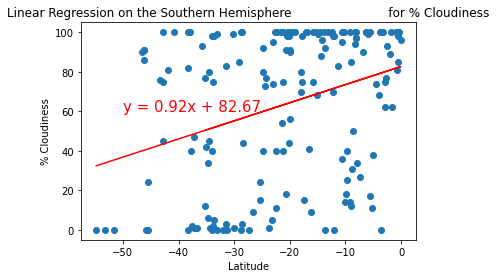

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

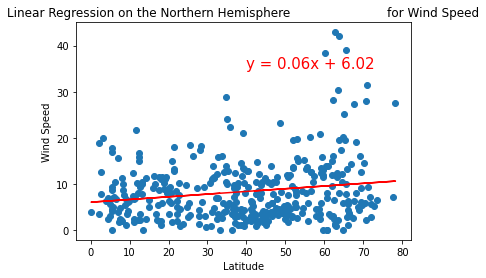

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

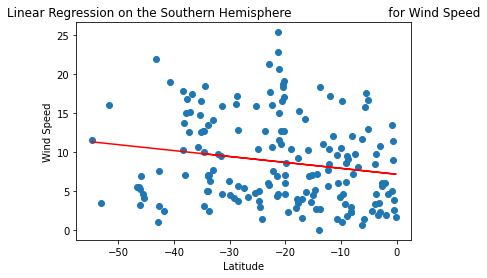

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))